TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import random as rd

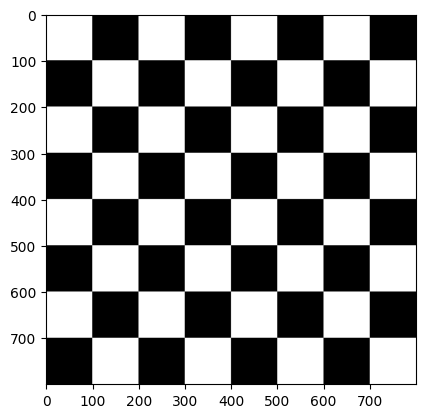

In [2]:
# Dimensiones de la imagen
ancho = 800
alto = 800

# Creacion de la imagen originalmente de color negro
tablero = np.zeros((alto, ancho, 1), dtype=np.uint8)

# Dibujado de los recuadros blancos del tablero
for i in range(0, alto, 100):
    for j in range(0, ancho, 100):
        if (i / 100) % 2 == 0:
            if (j / 100) % 2 == 0:
                tablero[i:i+100, j:j+100, 0] = 255
        else:
            if (j / 100) % 2 != 0:
                tablero[i:i+100, j:j+100, 0] = 255

plt.imshow(tablero, cmap="grey")
plt.show()

TAREA: Crear una imagen estilo Mondrian

In [3]:
# Función que pinta unn rectángulo de un color determinado
def pintar_rectangulo(imagen, x, y, r, g, b):
    imagen[x[0]:x[1], y[0]:y[1], 0] = r
    imagen[x[0]:x[1], y[0]:y[1], 1] = g
    imagen[x[0]:x[1], y[0]:y[1], 2] = b

In [4]:
# Función que genera rectángulos de tamaño y color aleatorios en una imagen
def pintar_mondrian(imagen, n_rectangulos):
    altura, ancho, n_canales = imagen.shape

    for i in range(n_rectangulos):
        x1 = rd.randint(0, altura)
        x2 = rd.randint(x1, altura)
        y1 = rd.randint(0, ancho)
        y2 = rd.randint(y1, ancho)

        r = rd.randint(0, 255)
        g = rd.randint(0, 255)
        b = rd.randint(0, 255)

        pintar_rectangulo(imagen, (x1, x2), (y1, y2), r, g, b)

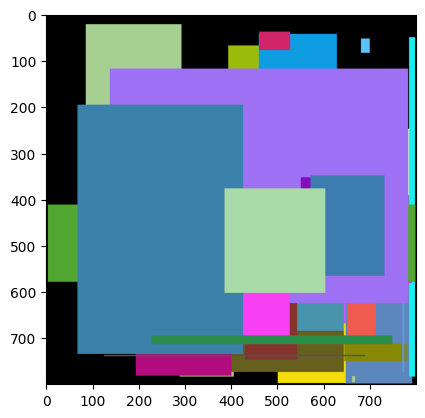

In [5]:
#Dimensiones de la imagen
ancho = 800
alto = 800

#Creacion de la imagen
mondrian = np.zeros((alto, ancho, 3), dtype=np.uint8)
pintar_mondrian(mondrian, 50)

plt.imshow(mondrian)
plt.show()

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

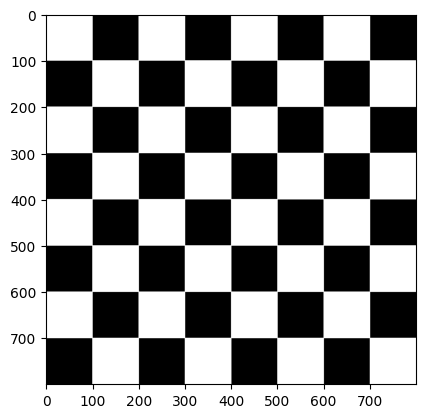

In [6]:
#Dimensiones de la imagen
ancho = 800
alto = 800

#Creacion de la imagen
tablero = np.zeros((alto, ancho, 1), dtype=np.uint8)

# Dibujado de los recuadros blancos del tablero utilizando la función de dibujo rectangle() de OpenCV
for i in range(0, alto, 100):
    for j in range(0, ancho, 100):
        if (i / 100) % 2 == 0:
            if (j / 100) % 2 == 0:
                cv2.rectangle(tablero, (i, j), (i + 100, j + 100), 255, -1)
        else:
            if (j / 100) % 2 != 0:
                cv2.rectangle(tablero, (i, j), (i + 100, j + 100), 255, -1)

plt.imshow(tablero, cmap="grey")
plt.show()

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [20]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Se separan los canales y además se recorta un trozo
        b = frame[100:200,200:300,0]
        g = frame[100:200,200:300,1]
        r = frame[100:200,200:300,2]

        # Se dibuja un rectángulo en el canal azul de la imagen
        frame[100:150, 200:250, 0] = 255
        h, w, c = frame.shape

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [8]:
# Función que busca el pixel más claro y más óscuro de una imagen
def buscar_minimo_maximo(imagen):
    # Dimensiones de la imagen
    ancho, altura, n_canales = imagen.shape

    pixel_minimo = (0, 0)
    valor_pixel_minimo = 255 * 3

    pixel_maximo = (0, 0)
    valor_pixel_maximo = 0
    
    for i in range(altura):
        for j in range(ancho):
            # Se obtiene el valor del pixel (i, j) en los tres canales de la imagen
            valor_pixel_actual = int(imagen[j, i, 0]) + int(imagen[j, i, 1]) + int(imagen[j, i, 2])

            # Se compara el valor obtenido para determinar si se trata de un mínimo y un máximo
            if (valor_pixel_actual < valor_pixel_minimo):
                pixel_minimo = (i, j)
                valor_pixel_minimo = valor_pixel_actual
            if(valor_pixel_actual > valor_pixel_maximo):
                pixel_maximo = (i, j)
                valor_pixel_maximo = valor_pixel_actual
    
    # Se devuelve el par de píxel de menor y mayor valor
    return [pixel_minimo, pixel_maximo]

In [21]:
vid = cv2.VideoCapture("AyagauresResult.m4v")
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
  
    # Hay nuevo fotograma
    if ret:
        # Se busca el píxel más claro y más oscuro de la imagen
        pixel_minimo, pixel_maximo = buscar_minimo_maximo(frame)
        # Se dibuja un circulo en el pixel de menor valor de la imagen
        cv2.circle(frame, pixel_minimo, 10, (255, 255, 255), -1)
        # Se dibuja un circulo en el pixel de mayor valor de la imagen
        cv2.circle(frame, pixel_maximo, 10, (0, 0, 0), -1)
        # Muestra fotograma
        cv2.imshow('Vid', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

In [22]:
# Función que busca la zona de 8x8 píxeles más clara y más óscurs de una imagen
def buscar_minimo_maximo_8x8(imagen):
    # Dimensiones de la imagen
    ancho, altura, n_canales = imagen.shape

    pixel_zona_minima = (0, 0)
    valor_zona_minima = (255 * 3) * (8 * 8)

    pixel_zona_maxima = (0, 0)
    valor_zona_maxima = 0

    # Se recorre la imagen en frágmentos de 8x8
    for i in range(0, altura, 8):
        for j in range(0, ancho, 8):

            i_final = i + 8
            j_final = j + 8

            if i_final > altura:
                i_final = altura
            
            if j_final > ancho:
                j_final = ancho
            
            valor_zona_actual = 0
            for i_zona in range(i, i_final):
                for j_zona in range(j, j_final):
                    # Se obtiene el valor de los tres canales de todos los píxeles de una zona
                    valor_zona_actual += int(imagen[j_zona, i_zona, 0]) + int(imagen[j_zona, i_zona, 1]) + int(imagen[j_zona, i_zona, 2])
            
            # Se compara el valor obtenido para determinar si se trata de un mínimo y un máximo
            if (valor_zona_actual < valor_zona_minima):
                pixel_zona_minima = (i, j)
                valor_zona_minima = valor_zona_actual
            if(valor_zona_actual > valor_zona_maxima):
                pixel_zona_maxima = (i, j)
                valor_zona_maxima = valor_zona_actual

    # Se devuelte un par de píxeles correspondiente a la esquina superior izquierda de las zonas 8x8 mas oscuras y más claras respectivamente 
    return [pixel_zona_minima, pixel_zona_maxima]
            

In [23]:
vid = cv2.VideoCapture("AyagauresResult.m4v")
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
  
    # Hay nuevo fotograma
    if ret:
        zona_minima, zona_maxima = buscar_minimo_maximo_8x8(frame)
        # Se dibuja un rectángulo en la zona 8x8 de menor valor de la imagen
        cv2.rectangle(frame, zona_minima, (zona_minima[0] + 8, zona_minima[1] + 8), (255, 255, 255), -1)
        # Se dibuja un rectángulo en la zona 8x8 de mayor valor de la imagen
        cv2.rectangle(frame, zona_maxima, (zona_maxima[0] + 8, zona_maxima[1] + 8), (0, 0, 0), -1)
        # Muestra fotograma
        cv2.imshow('Vid', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Llevar a cabo una propuesta propia de pop art

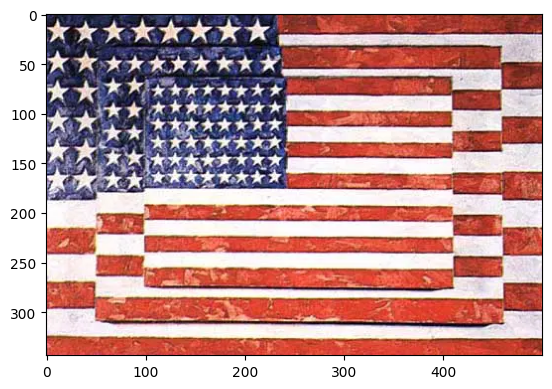

In [27]:
# Muestra de una imagen de ejemplo de lo que se va a realizar
img = cv2.imread('ejemplo.webp')

ejemplo = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(ejemplo) 
plt.show()

In [24]:
# Funcion que copia una imagen encima de otra de mayor tamaño
# Se indica la coordenada de la imagen original en la que se colocará la esquina superior izquierda de la imagen a copiar
def copiar_imagen(original, imagen_a_copiar, punto):
    ancho, altura, n_canales = imagen_a_copiar.shape
    
    for i in range(altura):
        for j in range(ancho):
            original[j + punto[1], i + punto[0], 0] = imagen_a_copiar[j, i, 0]
            original[j + punto[1], i + punto[0], 1] = imagen_a_copiar[j, i, 1]
            original[j + punto[1], i + punto[0], 2] = imagen_a_copiar[j, i, 2]

In [26]:
vid = cv2.VideoCapture("AyagauresResult.m4v")

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

while(True):      
    # fotograma a fotograma
    ret, frame_grande = vid.read()
  
    # Hay nuevo fotograma
    if ret:
        # Se crean dos copias del fotograma. La primera reducida un 25 % y la segunda reducida a la mitad de tamaño
        frame_medio = cv2.resize(frame_grande, (int(w * 0.75), int(h * 0.75)),cv2.INTER_NEAREST)
        frame_chico = cv2.resize(frame_grande, (int(w * 0.50), int(h * 0.50)),cv2.INTER_NEAREST)

        # Se modifican los canales de las imágenes para crear efectos de colores
        frame_chico[:,:,0] = 0
        frame_chico[:,:,1] = 0

        frame_medio[:,:,1] = 0
        frame_medio[:,:,2] = 0

        frame_grande[:,:,0] = 0
        frame_grande[:,:,2] = 0

        # Se calcula el centro de la imagen original
        centro_frame = (int(h / 2), int(w / 2))

        # Se copian las dos versiones de la imagen de forma que queden centradas en la image más grande
        copiar_imagen(frame_grande, frame_medio, (int(centro_frame[1] - (frame_medio.shape[1] / 2)), int(centro_frame[0] - (frame_medio.shape[0] / 2))))
        copiar_imagen(frame_grande, frame_chico, (int(centro_frame[1] - (frame_chico.shape[1] / 2)), int(centro_frame[0] - (frame_chico.shape[0] / 2))))
        # Muestra fotograma
        cv2.imshow('Vid', frame_grande)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()